##### Data = 'bank_marketing_updated_v1.csv'
##### Data Attributes Discription = 'Bank_Marketing_Campaign_Data_Attribute_Details.txt'

## Bank Marketing Campaign Case Study.

##### Introduction

A bank has conducted a telemarketing campaign for one of its financial products called ‘Term Deposits’ to help foster long-term relationships with the existing customers. The data set contains information of all the customers who were contacted during a particular year to open term deposit accounts with the bank.

##### What is a Term Deposit?

Term deposits, also called fixed deposits, are the cash investments that are made for a specific time period ranging from 1 month to 5 years at predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can be withdrawn only at the end of the maturity period. Withdrawing money before the maturity period would result in penalty charges and the customer will not receive any interest returns.

#### GOAL: To find likely Response customers investing in Term Deposits through Exploratory Data Analysis on "Bank telemarketing campaign".

#### Problem Statement:

The bank provides financial services/products such as savings accounts, current accounts and debit cards to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products, for example, credit cards, term deposits and loans. These campaigns are geared towards the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank's overall revenues as well as total profit increase. We need to apply our knowledge of EDA on the given data set to analyse the patterns and provide inferences/solutions for future marketing campaigns.

---------------------------

#### Importing the libraries.

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

1) Identifying data types

2) Fixing the rows and columns

3) Imputing/removing missing values

4) Handling outliers

5) Standardising the values

6) Fixing invalid values

7) Filtering the data

### Segment- 2, Data Collection and Data Types 

#### Read in the Data set. 

In [4]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

#### Read the file without unnecessary headers.

In [5]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv", skiprows =2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [6]:
inp0.drop("customerid", axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
dtypes: float64(1), int64(6), object(11)
memory usage: 6.2+ MB


In [8]:
inp0.shape

(45211, 18)

In [9]:
#average age of customers
inp0.age.mean()

40.93565090394105

#### Dividing jobedu into job and education. 

In [10]:
inp0['job']= inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [11]:
inp0['education']= inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [12]:
inp0.drop("jobedu", axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the month from column 'month' 

In [13]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))== True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


let's check the missing values in month column.

In [14]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Segment- 4, Impute/Remove missing values 

#### handling missing values in age column.

In [15]:
inp0.age.isnull().sum()

20

In [16]:
inp0.shape

(45211, 19)

In [17]:
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing. 

In [18]:
inp1= inp0[~inp0.age.isnull()].copy()
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [19]:
inp1.month.isnull().sum()

50

In [20]:
inp1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [21]:
month_mode= inp1.month.mode()[0]
month_mode

'may, 2017'

In [22]:
inp1.month.fillna(month_mode, inplace= True)
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [23]:
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [24]:
inp1.response.isnull().sum()

30

Target variable is better of not imputed.
- Drop the records with missing values.

In [25]:
inp1= inp1[~inp1.response.isnull()]

In [26]:
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [27]:
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Our objective is:
- we want the missing values to be ignored in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. will ignore the missing values.

In [28]:
inp1.loc[inp1.pdays<0, "pdays"]= np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

#### Age variable 

In [29]:
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

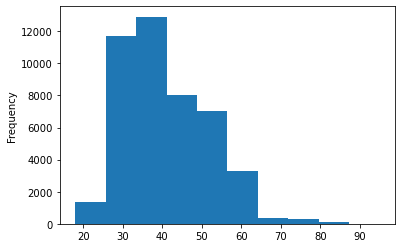

In [30]:
inp1.age.plot.hist()
plt.show()

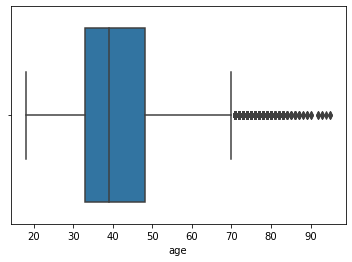

In [31]:
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [32]:
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

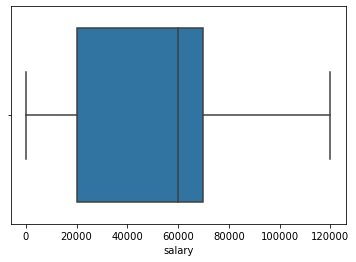

In [33]:
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [34]:
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

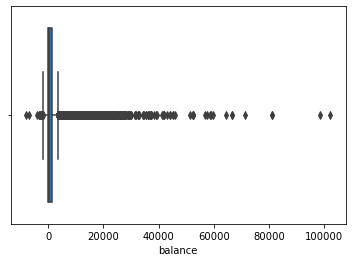

In [35]:
sns.boxplot(inp1.balance)
plt.show()

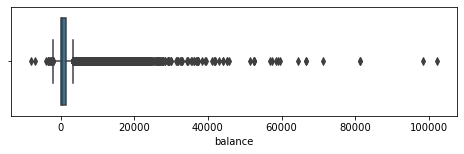

In [36]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [37]:
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

### Segment- 6, Standardising values 

#### Duration variable

In [38]:
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [39]:
inp1.duration= inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

The duration variable has data in minutes as well as seconds, which has to be converted into minutes only. 

duration.apply = to apply the funtion in duration variable;

x:float(x.split()[0])/60 = to convert the seconds into minutes as needed, maintaining in a single scale.

x.find("sec")>0 = to find the "sec" entries that are greater than zero

In [40]:
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

#### Marital status 

In [41]:
inp1.marital.value_counts(normalize= True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

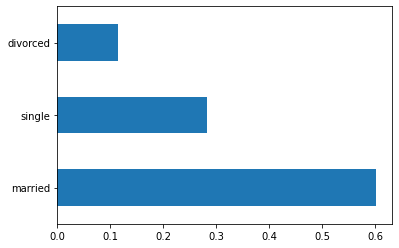

In [42]:
inp1.marital.value_counts(normalize= True).plot.barh()
plt.show()

#### Job  

In [43]:
inp1.job.value_counts(normalize= True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

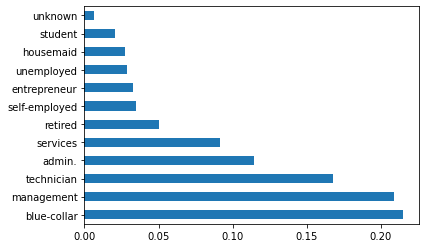

In [44]:
inp1.job.value_counts(normalize= True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

#### Education

In [45]:
inp1.education.value_counts(normalize= True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

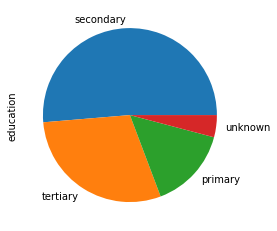

In [46]:
inp1.education.value_counts(normalize= True).plot.pie()
plt.show()

#### poutcome 

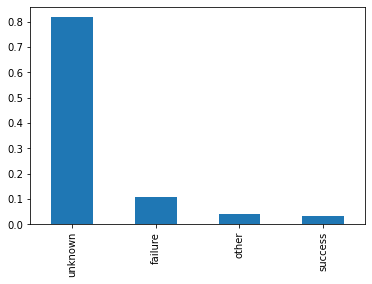

In [47]:
inp1.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

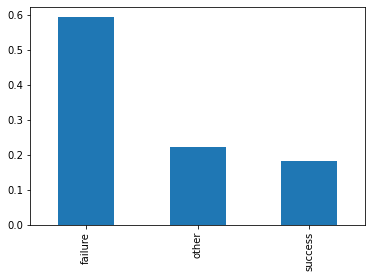

In [48]:
#Removing the unkown poutcome for better comparision plot
inp1[-(inp1.poutcome=='unknown')].poutcome.value_counts(normalize= True).plot.bar()
plt.show()

#### Response the target variable 

In [49]:
inp1.response.value_counts(normalize= True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

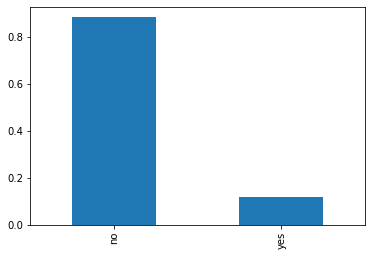

In [50]:
inp1.response.value_counts(normalize= True).plot.bar()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

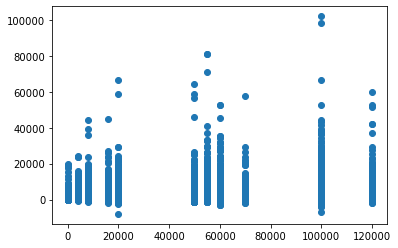

In [51]:
plt.scatter(inp1.salary, inp1.balance)
plt.show()

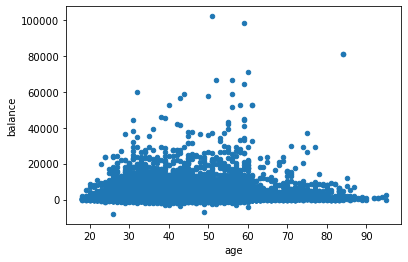

In [52]:
inp1.plot.scatter(x= "age", y= "balance")
plt.show()

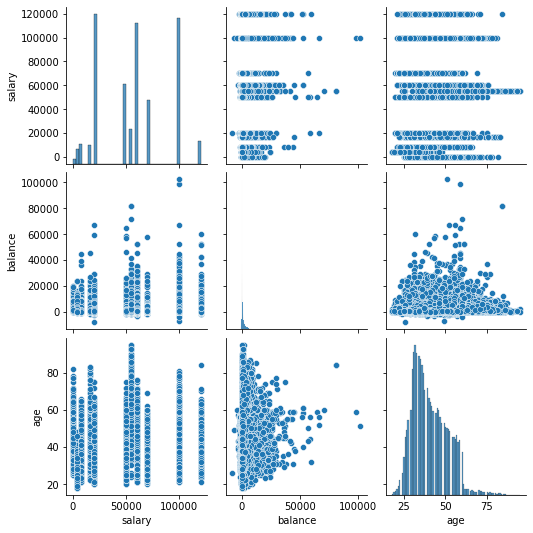

In [53]:
sns.pairplot(data= inp1, vars= ["salary", "balance", "age"])
plt.show()

#### Correlation heat map 

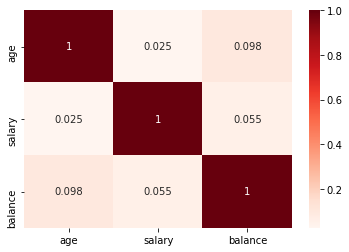

In [54]:
sns.heatmap(inp1[["age", "salary", "balance"]].corr(), annot= True, cmap= "Reds")
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [55]:
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [56]:
inp1.groupby("response")['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

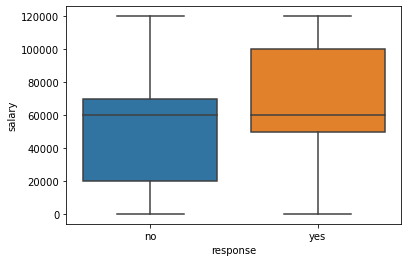

In [57]:
sns.boxplot(data= inp1, x= "response", y= "salary")
plt.show()

#### Balance vs response 

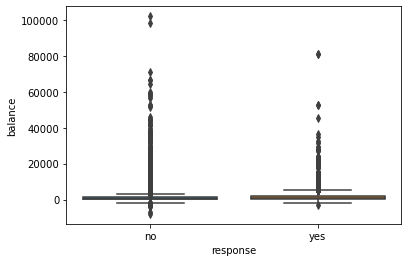

In [58]:
sns.boxplot(data= inp1, x= "response", y= "balance")
plt.show()

In [59]:
inp1.groupby("response")['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [60]:
inp1.groupby("response")['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile 

In [61]:
def p75(x):
    return np.quantile(x, 0.75)

In [62]:
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


<AxesSubplot:xlabel='response'>

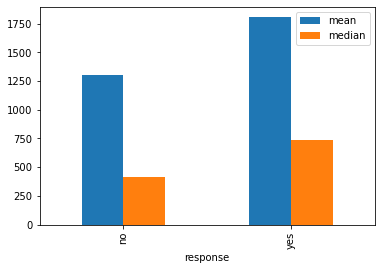

In [63]:
inp1.groupby('response')['balance'].aggregate(["mean", "median"]).plot.bar()

#### Education vs salary 

In [64]:
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [65]:
inp1.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

In [66]:
inp1.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

In [67]:
inp1.groupby('job')['salary'].median()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

### Segment- 5, Categorical categorical variable 

In [68]:
inp1['response_flag']= np.where(inp1.response== 'yes',1,0)

In [69]:
inp1.response_flag.value_counts(normalize= True)

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

#### Education vs response rate

In [70]:
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [71]:
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

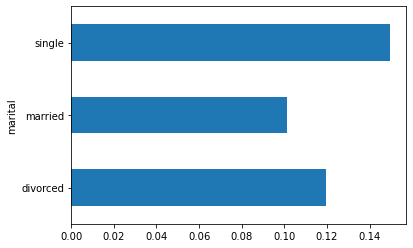

In [72]:
inp1.groupby(['marital'])['response_flag'].mean().plot.barh()
plt.show()

#### Loans vs response rate 

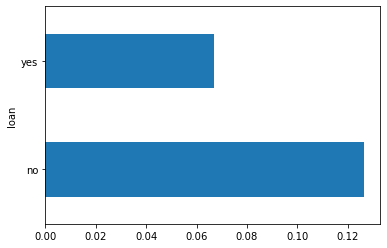

In [73]:
inp1.groupby(['loan'])['response_flag'].mean().plot.barh()
plt.show()

#### Housing loans vs response rate 

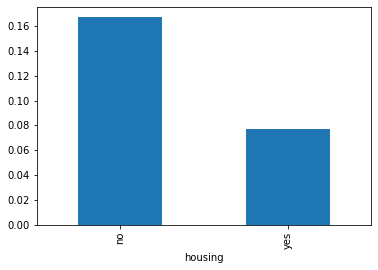

In [74]:
inp1.groupby(['housing'])['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response 

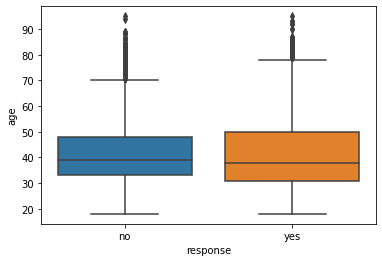

In [75]:
sns.boxplot(data= inp1, x= "response", y= "age")
plt.show()

##### making buckets from age columns 

In [76]:
inp1["age_group"]= pd.cut(inp1.age, [0,30,40,50,60,9999], labels= ["<30", "30-40", "40-50", "50-60", "60+"])
inp1.age_group.value_counts(normalize= True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

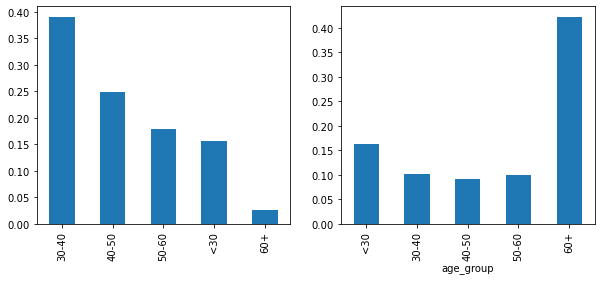

In [77]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])['response_flag'].mean().plot.bar()
plt.show()

<AxesSubplot:ylabel='job'>

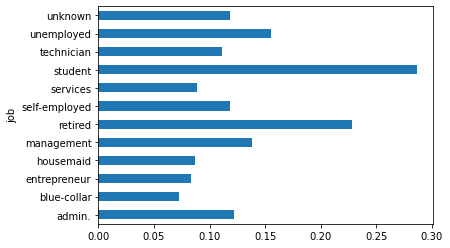

In [78]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

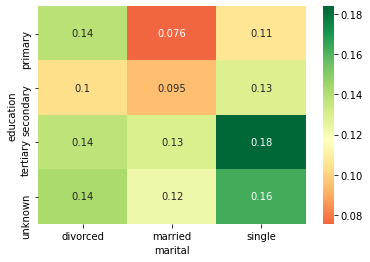

In [79]:
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

<AxesSubplot:xlabel='marital', ylabel='education'>

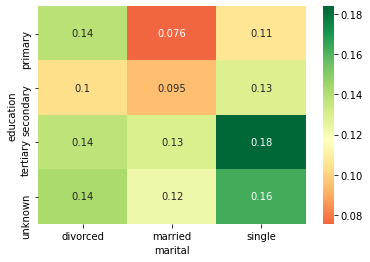

In [80]:
sns.heatmap(res,annot=True, cmap='RdYlGn',center=0.117)

#### Job vs marital vs response 

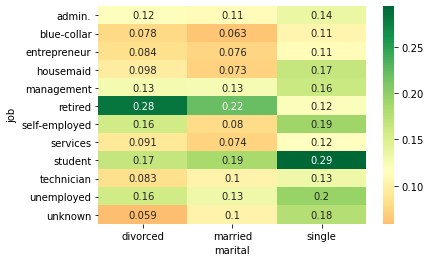

In [81]:
# Job vs marital vs response.
res = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

#### Education vs poutcome vs response

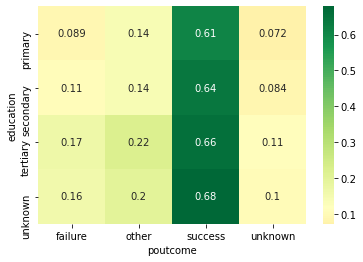

In [82]:
# education vs poutcome vs response.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

Notice here that we are taking the average as 0.117 which was average for overall data, but when we are looking at poutcomes we are also looking at folks who have been contacted earlier, hence maybe we need to recalculate the average

In [83]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


In [84]:
inp1[inp1.pdays>0].response_flag.mean()

0.2307785593014795

As we can see the avg of the people already contacted is double, hence we need to account that

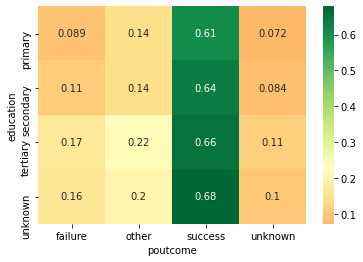

In [85]:
# education vs poutcome vs response.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.2308)
plt.show()

# Summary

#### Data Cleaning

1) Both heading rows have been deleted, as they have no use in our analysis. It is important to note here that if you find any irregularity at a glance through a data set, then it is highly essential that you get rid of it at the very first step.

2) the bank telemarketing data set contains a 'response' variable, which is basically the target variable of the data set.

3) Fixing Columns

    Customerid: It has been dropped, as it has no specific use in the analysis. 
    Jobedu: It has been separated to extract job and education. Job and education have to be analysed separately. we have to analyse how education and job play very important roles in determining the customer segment that will respond positively to term deposits.
    Month: The month name will be extracted based on the missing value imputation analysis.

4)  the age variable has outliers, although these can be treated as the normal values of age, because any person can be over 70 or 80 years of age. Also, the 70-90 age group is sparsely populated and participates in opening term deposit accounts, which is why this set of individuals fall out of the box plot, although they are not outliers and can be considered normal values.

5) Outlier detection technique: Sometimes, it is beneficial if we look into the quantiles instead of the box plot, mean or median. A quantile may give us a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or the 99th quantile, then there are outliers in the data set.

6) The duration variable has data in minutes as well as seconds, which has to be converted into minutes only. 

#### Univariate Analysis

1) Categorical Unordered Univariate Analysis; in this Dataset the 'job' variable is divided into many subcategories such as technician, blue-collar, services and management. There is no weight or measure assigned to any value in the 'job' column.

2) Married people have been contacted the most by the bank.

3) education, poutcome and response are the ordered categorical variables that follow a natural rank of order.

4) The bank has primarily contacted those customers who have completed their secondary education. (Pie chart)

5) For the majority of the customers, the previous campaign has not been conducted. (Refer to the bar graph) 'unknown' has the major share within the 'poutcome' variable.

6) However, there are higher values of the 'balance' and 'salary' variables that can be treated as outliers. Hence, it can be avoided while performing the analysis. 

#### Bivariate Analysis

1) In a bivariate analysis, when variables like marital status, job and education are plotted with response variables, we will be in a position to decide which categories in the respective columns have the highest chances of a positive reply. 

2) the 'Response' and the 'Salary' columns from the bank marketing dataset; the salary variable is varying with respect to the response variable, although the mean, maximum and minimum values are the same, customers with a higher salary range show interest in opening term deposit accounts with the bank. A different picture emerges when plotting a boxplot. The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

3) Numeric-Numeric Analysis; a pair plot shows that there is no correlation between the 'age', 'balance' and 'salary' variables.

4) Numerical-Categorical Analysis; Sometimes only a boxplot is not enough to draw insights, because of a high concentration of data and/or because of the presence of higher values in the data set, for example, the balance variable versus response variable. In such cases, it is a good practice to analyse the data using mean, median or quartiles. the mean and median values of the balance variable are higher for customers who gave a positive response, which is, again, true, because people who have higher bank account balances are more likely to invest in term deposits.

5) Categorical-Categorical Analysis; the positive response of customers to opening a term deposit with the bank increases with education level. From this, we can infer that the bank should contact people with higher education levels to effectively increase the positive response to opening a term deposit.

6) Also, based on marital status analysis, we can infer that single individuals have a higher positive response rate. This could be due to various reasons: One reason could be that compared with other categories of customers, single individuals have available income to deposit in long-term savings accounts (term deposit). Hence, the campaign should preferably target single customers.

7) Another very interesting inference is that people who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank. This is true, probably because people who have already availed loans may not have the necessary funds to invest in a term deposit.

8) the association between the age variable and the response rate; age group analysis showed that people in the age group of 60+ or <30 are more likely to respond positively. It may be true for older people, since they want to invest through more secure investment methods such as term deposits to have a secure old age. But the bank has mostly contacted people in the age group of 30-50 and has made much less contact with people in the age group of 60+, although the chances of getting a positive response are higher from people who are in the age group of 50+ or 60+. This is a very important insight that one can draw from this data set: The bank should target people in the 50+ age group.

#### Multivariate Analysis

1) three-variable analysis between education, marital status and response; people who are married and who have completed just their primary education are least likely to give a positive response to term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they will not prefer investing in term deposits.

2) three-variable analysis between job, marital status and response; the combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status. The bank should, therefore, consider these aspects before taking any decision.